# Star Wars Survey

This a survey performed by fivethirtyeight https://fivethirtyeight.com/, in order to answer some questions about the Star Wars franchise. The survey was conducted on survey monkey and was mainly aimed at Star Wars fans. Below, the data is loaded, cleaned and analyzed and some insight can be gained from the results.

This survey was performed before the release of "The Force Awakens"

In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

star_wars.head(10)

star_wars.shape

(1187, 38)

In [2]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [3]:
print(star_wars.shape)

(1186, 38)


In [4]:
star_wars.head()

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      
5                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: Episode IV  A New Hope   
5  Star Wars: Episode IV  A New Hope   

                                     Unnamed: 7  \
1  Star Wars: Episode V The Empire Strikes Back   
2                                           NaN   
3                                           NaN   
4  Star Wars: Episode V The Empire Strikes Back   
5  Star Wars: Episode V The Empire Strikes Back   

                                 Unnamed: 8  \
1  Star Wars: Episode VI Return of the Jedi   
2                                       NaN   
3                                       NaN   
4  Star Wars: Episode VI Return of the Jedi   
5  Star Wars: Episode VI Return of the Jedi   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

   ...         Unnamed: 28       Which character shot first?  \
1  ...      Very favorably  I don't understand this question   
2  ...                 NaN                               NaN   
3  ...    Unfamiliar (N/A)  

* It seems that we had one row where the respondendID was not defined

## Cleaning and Mapping Yes/No Columns

Checking the unique values of the "Have you seen any of the 6 films in the Star Wars franchise?" and the "Do you consider yourself to be a fan of the Star Wars film franchise?" columns:

In [5]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [6]:
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Mapping the calues to True/False/NaN values:b

In [7]:
yes_no_map = {
    'Yes':True,
    'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)


In [8]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [9]:
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleaning and Mapping Checkbox Columns:

In [10]:
import numpy as np

movie_mapping ={
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}


for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)
    
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2',
    'Unnamed: 5':'seen_3',
    'Unnamed: 6':'seen_4',
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6'
})

star_wars.head()
    

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
1    True    True    True    True    True    True   
2   False   False   False   False   False   False   
3    True    True    True   False   False   False   
4    True    True    True    True    True    True   
5    True    True    True    True    True    True   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

   ...         Unnamed: 28       Which character shot first?  \
1  ...      Very favorably  I don't understand this question   
2  ...                 NaN                               NaN   
3  ...    Unfamiliar (N/A)  I don't understand this question   
4  ...      Very favorably  I don't understand this question   
5  ...  Somewhat favorably                            Greedo   

  Are you familiar with the Expanded Universe?  \
1                                          Yes   
2                                          NaN   
3                                           No   
4                                           No   
5                                          Yes   

  Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦  \
1                                                 No                   
2                                                NaN                   
3                                                NaN                   
4                                                NaN                   
5                                                 No                   

  Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
1                                                 No                 Male   
2                                                Yes                 Male   
3                                                 No                 Male   
4                                                Yes                 Male   
5                                                 No                 Male   

     Age     Household Income                         Education  \
1  18-29                  NaN                High school degree   
2  18-29         $0 - $24,999                   Bachelor degree   
3  18-29         $0 - $24,999                High school degree   
4  18-29  $10

## Cleaning the Ranking Columns:

Converting the values of ranking columns to the float datatype and then renaming the columns.

In [11]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns ={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10' : 'ranking_2',
    'Unnamed: 11' : 'ranking_3',
    'Unnamed: 12' : 'ranking_4',
    'Unnamed: 13' : 'ranking_5',
    'Unnamed: 14' : 'ranking_6'
})

print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


## Finding the Highest-Ranked Movie:

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


<AxesSubplot:>

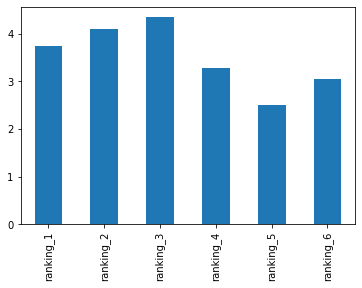

In [12]:
star_wars_ranks = star_wars[[col for col in star_wars.columns if 'ranking_' in col]].mean()

%matplotlib inline
print(star_wars_ranks)

star_wars_ranks.plot.bar()



We can see that the top Star Wars movie rated by fans was Star Wars Episode 3 - Revenge of the Sith

## Finding the Most Viewed Movie:

<AxesSubplot:>

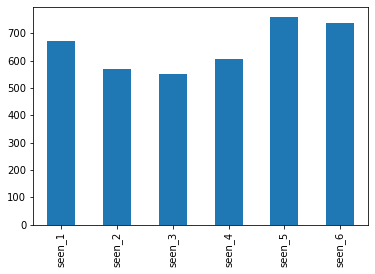

In [13]:
star_wars_most_seen = star_wars[[col for col in star_wars.columns if 'seen_' in col]].sum()

star_wars_most_seen.plot.bar()

* Comparing our results, it would seem that the movie with the most views was star_wars episode 5 - The Empire Strikes Back

* A strange relationship seems to exist between movie rankings and movie views - we see that the movie ranked the highest was the least viewed by the survey respondends where as the movie ranked the lowest was the movie most viewed by respondends.

* We keep in mind that the original movies(episodes 4-5-6) were seen much more by respondends than the newer movies(episodes 1-2-3), at the same time - we can see that the newer movies were ranked higher than the original movies.

## Exploring the Data by Binary Segments:

<AxesSubplot:>

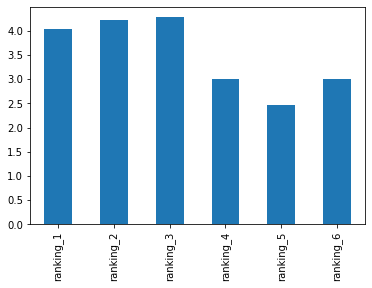

In [14]:
star_wars_males = star_wars[star_wars['Gender'] == 'Male']
star_wars_females = star_wars[star_wars['Gender'] == 'Female']


star_wars_males_rank = star_wars_males[[col for col in star_wars_males.columns if 'ranking_' in col]].mean()
star_wars_males_rank.plot.bar()


<AxesSubplot:>

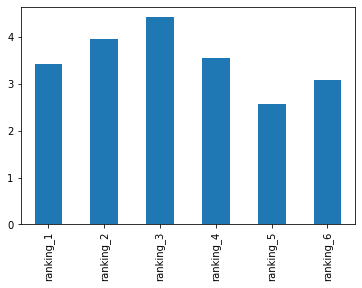

In [15]:
star_wars_females_rank = star_wars_females[[col for col in star_wars_females.columns if 'ranking_' in col]].mean()

star_wars_females_rank.plot.bar()

<AxesSubplot:>

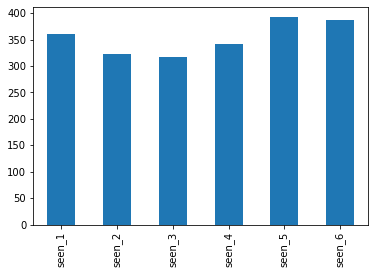

In [16]:
star_wars_males_views = star_wars_males[[col for col in star_wars_males.columns if 'seen_' in col]].sum()

star_wars_males_views.plot.bar()


<AxesSubplot:>

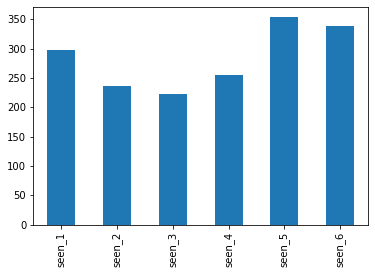

In [17]:
star_wars_females_views = star_wars_females[[col for col in star_wars_females.columns if 'seen_' in col]].sum()

star_wars_females_views.plot.bar()

* We see a general similarity in how males and females ranked the star wars movies

* We can clearly see that the movies where watched by more males than females.